Purpose: Clean, reproducible data pipeline including a quick demo section with the recommender function and the four visualizations for inline preview.

## Imports and Loading Data

In [1]:
# Import pandas and unicodedata
import pandas as pd
import unicodedata as ud

# Import movie data
tmdb_movies_raw = pd.read_csv("../data/raw/TMDB_movie_dataset_v11.csv")

## Data Exploration

In [2]:
# Quick view of movie data
tmdb_movies_raw.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [3]:
# View columns
tmdb_movies_raw.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [4]:
# View column info
tmdb_movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284604 entries, 0 to 1284603
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1284604 non-null  int64  
 1   title                 1284589 non-null  object 
 2   vote_average          1284604 non-null  float64
 3   vote_count            1284604 non-null  int64  
 4   status                1284604 non-null  object 
 5   release_date          1032687 non-null  object 
 6   revenue               1284604 non-null  int64  
 7   runtime               1284604 non-null  int64  
 8   adult                 1284604 non-null  bool   
 9   backdrop_path         329685 non-null   object 
 10  budget                1284604 non-null  int64  
 11  homepage              133934 non-null   object 
 12  imdb_id               637685 non-null   object 
 13  original_language     1284604 non-null  object 
 14  original_title        1284589 non-

In [5]:
# Count number of rows
len(tmdb_movies_raw) # 1284604 total

1284604

In [6]:
# View number of columns & rows
tmdb_movies_raw.shape

(1284604, 24)

In [7]:
# View sum of missing values in each column
tmdb_movies_raw.isna().sum()

id                            0
title                        15
vote_average                  0
vote_count                    0
status                        0
release_date             251917
revenue                       0
runtime                       0
adult                         0
backdrop_path            954919
budget                        0
homepage                1150670
imdb_id                  646919
original_language             0
original_title               15
overview                 282119
popularity                    0
poster_path              432933
tagline                 1105154
genres                   543626
production_companies     722384
production_countries     599837
spoken_languages         576191
keywords                 954188
dtype: int64

In [8]:
# View percentage of missing values in each column
tmdb_movies_raw.isna().sum() * 100 / len(tmdb_movies_raw)

id                       0.000000
title                    0.001168
vote_average             0.000000
vote_count               0.000000
status                   0.000000
release_date            19.610479
revenue                  0.000000
runtime                  0.000000
adult                    0.000000
backdrop_path           74.335671
budget                   0.000000
homepage                89.573908
imdb_id                 50.359410
original_language        0.000000
original_title           0.001168
overview                21.961554
popularity               0.000000
poster_path             33.701670
tagline                 86.030715
genres                  42.318567
production_companies    56.233983
production_countries    46.694312
spoken_languages        44.853589
keywords                74.278766
dtype: float64

In [9]:
# View unique status values
tmdb_movies_raw['status'].unique()

array(['Released', 'Planned', 'Post Production', 'Rumored',
       'In Production', 'Canceled'], dtype=object)

## Data Processing/Cleaning

### Creating Clean Working Dataframe

In [10]:
# Create new working dataframe for data cleaning
movies_clean = tmdb_movies_raw.copy()

### Creating Drops Log Dataframe & Adding Unreleased Films

In [11]:
# Create dataframe for dropped films and add unreleased films to it
drops_log = movies_clean.loc[movies_clean['status'] != 'Released'].copy()

### Removing Unreleased Films

In [12]:
# Create reason column and add unreleased reason for each row
drops_log['drop_reason'] = 'unreleased (status != "Released")'

# Count drops_log
len(drops_log)

38219

In [13]:
# Create dataframe for unreleased films
unreleased_d = drops_log.copy()

# Drop unreleased movies from movies_clean
movies_clean = movies_clean.loc[movies_clean['status'] == 'Released'].copy()

# Count movies_clean
len(movies_clean)

1246385

In [14]:
# Create snapshot dataframe for released movies
released_movies = movies_clean.copy()

### Removing Status Column

In [15]:
# Remove status column
movies_clean = movies_clean.drop(columns=['status'])

### Removing Adult Films & Adding to Drops Log

In [16]:
# View sum of adult films
movies_clean['adult'].sum()

np.int64(126026)

In [17]:
# Create dataframe for adult films
adult_d = movies_clean.loc[movies_clean['adult'] == True].assign(drop_reason='adult=True')

# Add adult films to drops_log
drops_log = pd.concat([drops_log, adult_d], axis=0)

# Drop adult films
movies_clean = movies_clean.loc[movies_clean['adult'] == False].copy()

# Count movies_clean
len(movies_clean)

1120359

In [18]:
# Create snapshot dataframe for sfw non-adult films
released_sfw = movies_clean.copy()

### Removing Adult Column

In [19]:
# Drop adult column
movies_clean = movies_clean.drop(columns=['adult'])

### Trimming Whitespace & Normalize

In [20]:
# Trim whitespace from titles, overviews, genres, keywords, and taglines
movies_clean = movies_clean.copy()
for col in ['title', 'overview', 'genres', 'keywords', 'tagline', 'production_companies', 'production_countries']:
    movies_clean[col] = movies_clean[col].astype('string').str.strip()

In [21]:
# Convert empties to missing values

text_cols = [c for c in ['title','overview','tagline'] if c in movies_clean]
subject_cols = [c for c in ['genres','keywords','production_companies','production_countries'] if c in movies_clean]

# Empty/whitespace -> NA
if text_cols:
    movies_clean[text_cols] = movies_clean[text_cols].replace(r'^\s*$', pd.NA, regex=True)

# Treat blank, '[]', '{}' (with or without spaces) as NA for subjects
if subject_cols:
    movies_clean[subject_cols] = movies_clean[subject_cols].replace(
        {r'^\s*$': pd.NA, r'^\[\s*\]$': pd.NA, r'^\{\s*\}$': pd.NA},
        regex=True
    )

# Quick peek: how many are missing
for c in text_cols + subject_cols:
    print(f"{c}: {movies_clean[c].isna().sum():,} NA")

title: 14 NA
overview: 246,627 NA
tagline: 963,339 NA
genres: 422,311 NA
keywords: 847,758 NA
production_companies: 677,793 NA
production_countries: 532,504 NA


In [22]:
# Create normalization columns

# Normalize title
movies_clean['title_norm'] = (
    movies_clean['title'].astype('string')
      .str.normalize('NFKC')
      .str.replace(r'[\u200B\u200C\u200D\u2060\uFEFF]', '', regex=True)
      .str.replace('…', '...', regex=False)
      .str.replace('\u00A0', ' ', regex=False)
      .str.replace('[“”]', '"', regex=True).str.replace("[‘’]", "'", regex=True)
      .str.replace('[–—]', '-', regex=True).str.replace('⁄', '/', regex=False)
      .str.replace(r'\s+', ' ', regex=True).str.strip()
)

# Normalize overview
movies_clean['overview_norm'] = (
    movies_clean['overview'].astype('string')
      .str.replace(r'https?://\S+|www\.\S+', ' ', regex=True)  # drop URLs
      .str.replace(r'\s+', ' ', regex=True).str.strip()
)

# Normalize keywords
movies_clean['keywords_norm'] = movies_clean['keywords'].astype('string').str.replace(r'\s+', ' ', regex=True).str.strip()

# Normalize genres
movies_clean['genres_norm'] = movies_clean['genres'].astype('string').str.replace(r'\s+', ' ', regex=True).str.strip()

# Normalize production companies
movies_clean['companies_norm'] = movies_clean['production_companies'].astype('string').str.replace(r'\s+', ' ', regex=True).str.strip()

# Normalize production countries
movies_clean['countries_norm'] = movies_clean['production_countries'].astype('string').str.replace(r'\s+', ' ', regex=True).str.strip()

In [23]:
# Convert empties in normalized fields to NA for clean dropping
for c in ['title_norm','overview_norm','keywords_norm','genres_norm']:
    movies_clean[c] = movies_clean[c].replace(r'^\s*$', pd.NA, regex=True)

### Removing Films Missing Title

In [24]:
# Count films with missing titles
movies_clean['title_norm'].isna().sum()

np.int64(14)

In [25]:
# Create dataframe for missing titles
missing_titles_d = movies_clean.loc[movies_clean['title_norm'].isna()].assign(drop_reason='missing:title')

# Add missing title films to drops log
drops_log = pd.concat([drops_log, missing_titles_d], axis=0)

# Drop films with missing title
movies_clean = movies_clean.dropna(subset=['title_norm']).copy()

# Count movies_clean
len(movies_clean)

1120345

In [26]:
# Create snapshot dataframe for sfw non-adult films excluding missing titles
released_sfw_has_title = movies_clean.copy()

### Removing Films Missing Important Core Fields

In [27]:
# Create missing important fields (overview, genres, or keywords) filter
missing_core = movies_clean[['overview_norm', 'genres_norm', 'keywords_norm', 'release_date']].isna().any(axis=1)

# Count rows missing important fields
missing_core.sum()

np.int64(903741)

In [28]:
# Create dataframe for missing important fields
missing_core_d = movies_clean.loc[missing_core].assign(drop_reason='missing_core_fields: overview,genres,keywords,release_date')

# Add missing important fields films to drops_log
drops_log = pd.concat([drops_log, missing_core_d], axis=0)

# Drop missing core fields (overview, genres, keywords) films
movies_clean = movies_clean.loc[movies_clean[['overview_norm', 'genres_norm', 'keywords_norm', 'release_date']].notna().all(axis=1)].copy()

# Count movies_clean
len(movies_clean)

216604

In [29]:
# Create snapshot dataframe for sfw non-adult films excluding missing titles and core fields
released_sfw_has_core_fields = movies_clean.copy()

In [30]:
# Check percentage of values still missing in each column
movies_clean.isna().sum() * 100 / len(movies_clean)

id                       0.000000
title                    0.000000
vote_average             0.000000
vote_count               0.000000
release_date             0.000000
revenue                  0.000000
runtime                  0.000000
backdrop_path           43.649240
budget                   0.000000
homepage                77.723865
imdb_id                 20.635815
original_language        0.000000
original_title           0.000000
overview                 0.000000
popularity               0.000000
poster_path             12.206146
tagline                 66.384277
genres                   0.000000
production_companies    24.600654
production_countries    14.773504
spoken_languages        12.922199
keywords                 0.000000
title_norm               0.000000
overview_norm            0.000000
keywords_norm            0.000000
genres_norm              0.000000
companies_norm          24.600654
countries_norm          14.773504
dtype: float64

### Removing Obscure Symbol-Only Title Films

In [31]:
# Symbol-only titles filter

# Create symbol-only title filter
symbol_only_titles = movies_clean['title_norm'].astype('string').str.match(r'^[\W_]+$', na=False)

# Count symbol-only titles
symbol_only_titles.sum()

np.int64(8)

In [32]:
# View symbol-only titles
movies_clean.loc[symbol_only_titles, ['title', 'title_norm', 'vote_count', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords']].head(10)

,title,title_norm,vote_count,original_title,overview,popularity,tagline,genres,keywords
34531,$,$,35,$,A bank security expert plots with a call girl ...,4.0190,The BIG bank-heist is on!,"Comedy, Crime, Drama","prostitute, drug smuggling, germany, heist"
97022,(),(),7,(),"P. Adams Sitney, Professor of Visual Art at Pr...",0.6000,<NA>,Documentary,"short film, experimental film, preserved film"
240862,",",",",1,.,A surreal visual film about the inner feelings...,0.6000,They're All Gonna Laugh At You,Drama,body dysmorphia
484397,(…),(...),0,(…),"Ron, the filmmaker’s father, has a brain injur...",0.6000,<NA>,Documentary,"artist, brain injury, father and daughter, fat..."
486482,#,#,0,#,"The story of Bia Leal, a successful blogger wh...",0.6000,<NA>,Drama,"shocking, complex, conceited"
650690,-. --- .. ... .,-. --- .. ... .,0,-. --- .. ... .,A visual essay shot entirely on a Nintendo 3DS,0.0071,A visual essay shot entirely on a Nintendo 3DS,Music,"avant-garde, essay film, experimental"
757914,•,•,0,•,An experiment in meditative and stripped down ...,0.6730,<NA>,Animation,"experimental, animation"
837838,△▽,△▽,0,△▽,Experimental one minute corridor animation fro...,0.6000,<NA>,Animation,"computer animation, short film"


In [33]:
# Filter for obscure symbol-only titles
pop = pd.to_numeric(movies_clean['popularity'], errors='coerce').fillna(0)
vc = pd.to_numeric(movies_clean['vote_count'], errors='coerce').fillna(0)
ovlen = movies_clean['overview_norm'].astype('string').str.len().fillna(0)

low_signal = (vc <= 10) & (pop <= 2)
obscure_symbol_titles = symbol_only_titles & low_signal

movies_clean.loc[obscure_symbol_titles, ['title', 'title_norm', 'vote_count', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords']].head(10)

,title,title_norm,vote_count,original_title,overview,popularity,tagline,genres,keywords
97022,(),(),7,(),"P. Adams Sitney, Professor of Visual Art at Pr...",0.6000,<NA>,Documentary,"short film, experimental film, preserved film"
240862,",",",",1,.,A surreal visual film about the inner feelings...,0.6000,They're All Gonna Laugh At You,Drama,body dysmorphia
484397,(…),(...),0,(…),"Ron, the filmmaker’s father, has a brain injur...",0.6000,<NA>,Documentary,"artist, brain injury, father and daughter, fat..."
486482,#,#,0,#,"The story of Bia Leal, a successful blogger wh...",0.6000,<NA>,Drama,"shocking, complex, conceited"
650690,-. --- .. ... .,-. --- .. ... .,0,-. --- .. ... .,A visual essay shot entirely on a Nintendo 3DS,0.0071,A visual essay shot entirely on a Nintendo 3DS,Music,"avant-garde, essay film, experimental"
757914,•,•,0,•,An experiment in meditative and stripped down ...,0.6730,<NA>,Animation,"experimental, animation"
837838,△▽,△▽,0,△▽,Experimental one minute corridor animation fro...,0.6000,<NA>,Animation,"computer animation, short film"


In [34]:
# Create dataframe for obscure symbol-only titles
obscure_symbol_titles_d = movies_clean.loc[obscure_symbol_titles].assign(drop_reason='obscure-symbol-only-title')

# Add obscure symbol-only titles to drops_log
drops_log = pd.concat([drops_log, obscure_symbol_titles_d], axis=0)

# Drop obscure symbol-only titles
movies_clean = movies_clean.loc[~obscure_symbol_titles].copy()

In [35]:
# Count movies_clean
len(movies_clean)

216597

In [36]:
# Create snapshot dataframe for sfw non-adult films excluding those missing core fields and obscure symbol-only title films
released_sfw_core_text_titles = movies_clean.copy()

### Removing Exact Duplicates

In [37]:
# Find exact duplicates

# Pre exact deduping count
before_exact_deduping = len(movies_clean)

exact_dupe_mask = movies_clean.duplicated(keep='first')

exact_dupes_d = movies_clean.loc[exact_dupe_mask].assign(drop_reason='exact_row_duplicate')

# View rows to be dropped
exact_dupes_d

,id,title,vote_average,vote_count,release_date,revenue,runtime,backdrop_path,budget,homepage,...,production_countries,spoken_languages,keywords,title_norm,overview_norm,keywords_norm,genres_norm,companies_norm,countries_norm,drop_reason
273577,1199990,The Undead,10.0,1,2023-10-27,0,66,NaN,420000,https://theundeadfilm.squarespace.com/,...,United States of America,NaN,"undead, religion, dead children, religious horror",The Undead,At the end of times a dysfunctional family tak...,"undead, religion, dead children, religious horror","Horror, Thriller","Bud Rebel Productions, TEGMENTAL",United States of America,exact_row_duplicate
356336,1224437,The Jury of Fate,0.0,0,1917-08-06,0,50,NaN,0,NaN,...,United States of America,NaN,canadian northwest,The Jury of Fate,Henri Labordie (Tavernier) is the father of tw...,canadian northwest,Drama,Metro Pictures Corporation,United States of America,exact_row_duplicate
363066,1228402,Creating With Textures,0.0,0,1971-01-01,0,10,/uOMhJ25NIOWfC8T7go1KAcb9ra6.jpg,0,NaN,...,United States of America,NaN,art,Creating With Textures,This educational film illustrates various text...,art,Documentary,Coronet Instructional Films,United States of America,exact_row_duplicate
364787,1232080,Nakamori Akina - Live In '87 A HUNDRED Days,0.0,0,1993-08-25,0,47,/vVo4qI48nz03oujw4g81ZdNOBih.jpg,0,https://wmg.jp/akina/discography/3298/,...,Japan,Japanese,"concert, japanese music, idol",Nakamori Akina - Live In '87 A HUNDRED Days,Live in '87 A HUNDRED days is the seventh vide...,"concert, japanese music, idol",Music,Warner Music Japan,Japan,exact_row_duplicate
367079,1192944,Christmas Concert with Odd Nordstoga,0.0,0,2016-12-23,0,42,/7nLjqQ4hxreGJwkkcgdZDqvzpz3.jpg,0,NaN,...,Norway,Norwegian,christmas concert,Christmas Concert with Odd Nordstoga,Odd Nordstoga invites you to an intimate and b...,christmas concert,Music,NRK,Norway,exact_row_duplicate
368901,1192968,Merry Christmas,0.0,0,1964-12-25,0,31,/4Z3KwaYuE5MK5U5vjHMY9hPVnHF.jpg,0,NaN,...,Norway,Norwegian,christmas,Merry Christmas,Picture story about Christmas and Christmas ce...,christmas,Documentary,NRK,Norway,exact_row_duplicate
368996,1225256,Redgey,0.0,0,2023-12-31,0,4,NaN,0,https://vimeo.com/898977865,...,<NA>,NaN,"marionettes, puppets, short film, experimental",Redgey,An orphaned raccoon happens to have a unique t...,"marionettes, puppets, short film, experimental",Drama,<NA>,<NA>,exact_row_duplicate
394141,1215379,Fantasymphony II - A Concert of Fire and Magic,0.0,0,2023-11-17,0,97,/y4xpufVAlZXJUqzcB6AIlVte4fc.jpg,0,https://www.dr.dk/drtv/episode/dr2-soundtrack_...,...,Denmark,Danish,concert,Fantasymphony II - A Concert of Fire and Magic,Take the DR Symphony Orchestra and Jakob Stege...,concert,Music,DR,Denmark,exact_row_duplicate
405022,1266487,Becoming Family,0.0,0,2006-10-07,0,74,NaN,0,NaN,...,United States of America,English,"volunteer, medical documentary",Becoming Family,Six months after a tsunami hit South Asia on D...,"volunteer, medical documentary",Documentary,Typecasting Films,United States of America,exact_row_duplicate
436644,1232529,Leica Story,0.0,0,2016-10-03,0,19,NaN,0,NaN,...,<NA>,Spanish,spanish civil war (1936-39),Leica Story,Robert is a war photographer who moves to an a...,spanish civil war (1936-39),"History, Drama",<NA>,<NA>,exact_row_duplicate


In [38]:
# Add exact duplicates to drops_logs
drops_log = pd.concat([drops_log, exact_dupes_d], axis=0)

# Drop exact duplicates
movies_clean = movies_clean.drop_duplicates()

# Calculate number of exact duplicates dropped
removed = before_exact_deduping - len(movies_clean)

# View how many exact duplicates were dropped
removed

13

In [39]:
# Count movies_clean
len(movies_clean)

216584

In [40]:
# Create snapshot dataframe for sfw non-adult films excluding those missing core fields, obscure symbol-only title films, and exact row dupes
released_sfw_core_text_titles_no_row_dupes = movies_clean.copy()

### Removing ID Dupes

In [41]:
# Rollback copy just in case
movies_rollback = movies_clean.copy()

# Work on a copy
df = movies_clean.copy()

# Pre id deduping count
before_id_deduping = len(df)

In [42]:
# Flags for sorting priority

# Prioritize non-zero (non-missing) runtime
rt = pd.to_numeric(df['runtime'], errors='coerce') if 'runtime' in df else pd.Series(0, index=df.index)
nonzero_rt = rt.fillna(0).gt(0)

# Prioritize higher vote count
vc = pd.to_numeric(df['vote_count'], errors='coerce') if 'vote_count' in df else pd.Series(0, index=df.index)

# Prioritize higher popularity
pop = pd.to_numeric(df['popularity'], errors='coerce') if 'popularity' in df else pd.Series(0, index=df.index)

# Priotize earlier release date
date = pd.to_datetime(df['release_date'], errors='coerce') if 'release_date' in df else pd.Series(pd.NaT, index=df.index)

# Prioritize non-missing tagline
tg = df['tagline'].astype('string') if 'tagline' in df.columns else pd.Series('', index=df.index, dtype='string')
has_tag = tg.str.len().gt(0)

In [43]:
# Sort exact id dupes in priority order
df_sorted = df.assign(_nonzero_rt=nonzero_rt, _has_tag=has_tag, _vc=vc.fillna(0), _pop=pop.fillna(0), _date=date)
df_sorted = df_sorted.sort_values(['_nonzero_rt','_vc','_pop','_date','_has_tag','id'], ascending=[ False, False, False, True, False, True])

In [44]:
# Log the rows that will be be dropped

dupe_id_mask = df_sorted.duplicated(subset='id', keep='first')

id_dupes_d = df_sorted.loc[dupe_id_mask].assign(drop_reason='duplicate_id')

# View rows to be dropped
id_dupes_d

,id,title,vote_average,vote_count,release_date,revenue,runtime,backdrop_path,budget,homepage,...,keywords_norm,genres_norm,companies_norm,countries_norm,_nonzero_rt,_has_tag,_vc,_pop,_date,drop_reason
642646,1525030,Detective Kibbles: Part 2 | Remastered,0.0,0,2025-08-04,0,10,/q436vhtfFMJzaqkSgiy9wDhZ3FI.jpg,30,NaN,...,"police, detective, drama, kibbles","Crime, Comedy, Drama",MattMigFilms,<NA>,True,True,0,0.0286,2025-08-04,duplicate_id
642643,1525030,Detective Kibbles: Part 2 | Remastered,0.0,0,2025-08-04,0,10,/q436vhtfFMJzaqkSgiy9wDhZ3FI.jpg,30,NaN,...,"police, detective, drama, kibbles","Crime, Comedy, Drama",MattMigFilms,<NA>,True,True,0,0.0218,2025-08-04,duplicate_id


In [45]:
# Check how many dupes were removed

drops_log = pd.concat([drops_log, id_dupes_d], axis=0)

# Keep best per id, clean temp cols
df = df_sorted.drop_duplicates(subset='id', keep='first').drop(columns=['_cleaner_ov','_nonzero_rt','_has_tag','_vc','_pop','_date'], errors='ignore')

print("Removed by exact ID:", before_id_deduping - len(df))

len(df)

Removed by exact ID: 2


216582

In [46]:
# Save changes to main dataframe
movies_clean = df.copy()

In [47]:
# Create snapshot dataframe for sfw non-adult films excluding those missing core fields, obscure symbol-only title films, and exact row or id dupes
released_sfw_core_text_titles_no_row_id_dupes = movies_clean.copy()

### Finding & Removing Logical Dupes

In [48]:
# Check groups of films with same title + year

tmp = movies_clean.assign(
    _title_key = movies_clean.get('title_norm', movies_clean['title']).astype('string')
                  .str.casefold().str.replace(r'\s+', ' ', regex=True).str.strip(),
    _year = pd.to_datetime(movies_clean['release_date'], errors='coerce').dt.year
)

# Stable counts DataFrame
counts = (
    tmp.groupby(['_title_key','_year']).size()
       .to_frame('count')
       .query('count > 1')
       .sort_values('count', ascending=False)
       .reset_index()
)

print(f"Groups with >1 rows: {len(counts)}")
display(counts.head(20))

# Preview rows for the top N clusters
N = 5
top_pairs = counts.head(N)[['_title_key','_year']]

preview = (tmp.merge(top_pairs, on=['_title_key','_year'])
             .merge(counts, on=['_title_key','_year'])
             .sort_values(['count','_title_key','_year','runtime','vote_count','popularity'],
                          ascending=[False, True, True, False, False, False]))

display(preview[['count','_title_key','_year','id','title','release_date','runtime',
                 'original_language','genres','vote_count','popularity', 'original_title', 'overview']])


Groups with >1 rows: 1327


,_title_key,_year,count
0,emesis blue,2023,6
1,alone,2017,5
2,oasis,2017,5
3,together,2021,4
4,alone,2020,4
5,adam,2019,4
6,listen,2017,4
7,brothers,2015,4
8,eden,2014,4
9,eden,2019,4


,count,_title_key,_year,id,title,release_date,runtime,original_language,genres,vote_count,popularity,original_title,overview
21,6,emesis blue,2023,1505712,Emesis Blue,2023-02-21,109,en,"Horror, Thriller, Animation",0,0.0929,Emesis Blue,"On Halloween Night of 1968, an executive of th..."
9,6,emesis blue,2023,1375956,Emesis Blue,2023-02-20,108,en,"Animation, Horror, Mystery",1,1.4000,Emesis Blue,When an executive of the BLU Corporation myste...
10,6,emesis blue,2023,1376566,Emesis Blue,2023-02-20,108,en,"Horror, Mystery, Animation, Thriller",1,0.9610,Emesis Blue,When an executive of the BLU Corporation myste...
12,6,emesis blue,2023,1519224,Emesis Blue,2023-02-20,108,en,"Horror, Animation, Crime, Mystery, Science Fic...",1,0.0429,Emesis Blue,"On Halloween Night of 1968, an executive of th..."
14,6,emesis blue,2023,1282209,Emesis Blue,2023-02-20,108,en,"Animation, Horror, Crime",0,1.2940,Emesis Blue,When an executive of the BLU Corporation myste...
22,6,emesis blue,2023,1473999,Emesis Blue,2023-02-21,108,en,"Horror, Animation, Thriller",0,0.0429,Emesis Blue,"On Halloween Night of 1968, an executive of th..."
1,5,alone,2017,420950,Alone,2017-02-08,90,fr,"Fantasy, Science Fiction, Horror",491,6.5560,Seuls,Five kids wake up in a world where everybody h...
15,5,alone,2017,574921,Alone,2017-09-21,59,cs,"Drama, Documentary",0,0.8520,Sama,Alone is about the 91-year-old actress and wri...
6,5,alone,2017,444057,Alone,2017-02-27,14,en,"Action, Drama, Thriller",3,1.2120,ALONE,Trust is dead in this world. A man has to trus...
5,5,alone,2017,441956,Alone,2017-01-14,13,en,Documentary,7,1.1580,Alone,This investigation into the layers of mass inc...


In [49]:
# Create flags/keys

dedupe_flags = pd.DataFrame(index=movies_clean.index)

# Normalized keys
dedupe_flags['_tk'] = (movies_clean['title_norm'].astype('string').str.casefold().str.replace(r'\s+', ' ', regex=True).str.strip())
dedupe_flags['_date'] = pd.to_datetime(movies_clean['release_date'], errors='coerce')
dedupe_flags['_yr'] = dedupe_flags['_date'].dt.year
dedupe_flags['_ym'] = dedupe_flags['_date'].dt.to_period('M').astype('string')  # 'YYYY-MM'
dedupe_flags['_ov_key'] = (movies_clean['overview_norm'].astype('string').str.casefold().str.replace(r'\W+',' ', regex=True).str.strip())
dedupe_flags['_lang'] = movies_clean['original_language']

# Ranking / quality signals (keep priority below)
dedupe_flags['_has_rt'] = pd.to_numeric(movies_clean['runtime'], errors='coerce').fillna(0).gt(0)
dedupe_flags['_vc'] = pd.to_numeric(movies_clean['vote_count'], errors='coerce').fillna(0)
dedupe_flags['_pop'] = pd.to_numeric(movies_clean['popularity'], errors='coerce').fillna(0)
dedupe_flags['_has_tag'] = (movies_clean.get('tagline', pd.Series('', index=movies_clean.index)).astype('string').str.strip().ne(''))
_ov_letters = movies_clean['overview_norm'].astype('string').str.replace(r'[^A-Za-z]+',' ', regex=True)
dedupe_flags['_ov_len'] = _ov_letters.str.len().fillna(0)
dedupe_flags['_id'] = movies_clean['id']

# Rule A (Exact overview) group sizes
dedupe_flags['_ov_size'] = (dedupe_flags.groupby(['_tk','_ov_key'])['_id'].transform('size'))

print(
    "Exact-overview dupes - groups:",
    dedupe_flags.loc[dedupe_flags['_ov_size']>1, ['_tk','_ov_key']].drop_duplicates().shape[0],
    "| rows:",
    int((dedupe_flags['_ov_size']>1).sum())
)

Exact-overview dupes - groups: 87 | rows: 184


In [50]:
# Exact overview dupes: same normalized title (_tk) + same normalized overview (_ov_key)

view_cols = ['id','title','original_title','original_language', 'release_date','runtime','genres','vote_count','popularity','tagline']

cand_ov = dedupe_flags[dedupe_flags['_ov_size'] > 1].copy()

preview_ov = (movies_clean.loc[cand_ov.index, view_cols]
                .join(cand_ov[['_tk','_yr','_ov_key','_has_rt','_vc','_pop','_date','_has_tag','_ov_len']])
                .sort_values(['_tk','_yr','_ov_key','_has_rt','_vc','_pop','_date','_has_tag','_ov_len','id'],
                             ascending=[True, True, True, False, False, False, True, False, False, True])
             )

print("Rule A (exact overview) - candidate rows:", len(preview_ov))
display(preview_ov.head(20))

Rule A (exact overview) - candidate rows: 184


,id,title,original_title,original_language,release_date,runtime,genres,vote_count,popularity,tagline,_tk,_yr,_ov_key,_has_rt,_vc,_pop,_date,_has_tag,_ov_len
33974,28769,A Christmas Carol,A Christmas Carol,en,2004-11-28,87,Drama,36,7.7620,<NA>,a christmas carol,2004,miser ebenezer scrooge is awakened on christma...,True,36,7.7620,2004-11-28,<NA>,375
1019,17979,A Christmas Carol,A Christmas Carol,en,2009-11-04,94,"Animation, Family, Fantasy",4173,28.2030,Season's Greedings,a christmas carol,2009,miser ebenezer scrooge is awakened on christma...,True,4173,28.2030,2009-11-04,True,375
1214961,779144,A Safe Place,A Safe Place,en,2019-08-07,84,Comedy,0,0.6010,<NA>,a safe place,2019,in a post apocalyptic australia a revenge fill...,True,0,0.6010,2019-08-07,<NA>,173
241061,1028482,A Safe Place,A Safe Place,en,2020-02-01,31,Drama,1,0.6000,<NA>,a safe place,2020,in a post apocalyptic australia a revenge fill...,True,1,0.6000,2020-02-01,<NA>,173
170997,133018,A Streetcar Named Desire,A Streetcar Named Desire,en,1984-03-04,119,"Drama, TV Movie",3,2.3110,<NA>,a streetcar named desire,1984,blanche dubois goes to visit her pregnant sist...,True,3,2.3110,1984-03-04,<NA>,390
49798,133021,A Streetcar Named Desire,A Streetcar Named Desire,en,1995-10-24,156,"Drama, TV Movie",20,3.0950,<NA>,a streetcar named desire,1995,blanche dubois goes to visit her pregnant sist...,True,20,3.0950,1995-10-24,<NA>,390
230301,1006604,Ache,Ache,en,2020-08-16,3,Drama,1,0.6000,It helps eating cereal in the bathtub.,ache,2020,to escape his claustrophobic state a kid takes...,True,1,0.6000,2020-08-16,True,78
1159762,1007824,Ache,Ache,en,2020-08-16,3,Drama,0,0.6000,Don't undress for a bath.,ache,2020,to escape his claustrophobic state a kid takes...,True,0,0.6000,2020-08-16,True,78
216126,233748,Antony and Cleopatra,Antony and Cleopatra,en,1975-01-04,161,"Drama, History",2,1.6190,<NA>,antony and cleopatra,1975,adaptation of shakespeare s play,True,2,1.6190,1975-01-04,<NA>,33
321303,233750,Antony and Cleopatra,Antony and Cleopatra,en,1983-01-01,179,Drama,1,1.3150,<NA>,antony and cleopatra,1983,adaptation of shakespeare s play,True,1,1.3150,1983-01-01,<NA>,33


In [51]:
# Choose ONE "winner" per exact-overview group using the keep priority. (Staging only, not dropping yet.)

winners_ov = (preview_ov
    .sort_values(['_has_rt','_vc','_pop','_date','_has_tag','_ov_len','id'],
                 ascending=[ False, False, False, True, False, False, True])
    .groupby(['_tk','_ov_key'], group_keys=False)
    .head(1)
)

losers_ov_idx = preview_ov.index.difference(winners_ov.index)
log_ov = movies_clean.loc[losers_ov_idx].copy()
log_ov['drop_reason'] = 'logical_dupe_exact_overview'

if 'logical_dupes_d' not in globals():
    logical_dupes_d = pd.DataFrame()
logical_dupes_d = pd.concat([logical_dupes_d, log_ov], axis=0)
logical_dupes_d = logical_dupes_d[~logical_dupes_d.index.duplicated(keep='first')]

print("Staged (Rule A) rows for drop:", len(log_ov))
print("Total staged logical dupes so far:", len(logical_dupes_d))

Staged (Rule A) rows for drop: 97
Total staged logical dupes so far: 97


In [52]:
# RULE B (Month/Year + Language dupes):
# same normalized title (_tk) + same release month-year (_ym) + same language (_lang)
# View preview on a COPY that excludes Rule A losers; movies_clean remains unchanged.

work_idx = movies_clean.index.difference(logical_dupes_d.index) if 'logical_dupes_d' in globals() else movies_clean.index
work = movies_clean.loc[work_idx].copy()
flags_w = dedupe_flags.loc[work_idx].copy()

# Build group sizes per (_tk, _ym, _lang)
flags_w['_mylang_size'] = flags_w.groupby(['_tk','_ym','_lang'])['_id'].transform('size')

# Candidates for Rule B = groups with size > 1
cand_month = flags_w[flags_w['_mylang_size'] > 1].copy()

view_cols = ['id','title','original_title','original_language',
             'release_date','runtime','genres','vote_count','popularity','tagline']

preview_month = (work.loc[cand_month.index, view_cols]
                   .join(cand_month[['_tk','_ym','_lang','_has_rt','_vc','_pop','_date','_has_tag','_ov_len']])
                   .sort_values(['_tk','_ym','_lang',
                                 '_has_rt','_vc','_pop','_date','_has_tag','_ov_len','id'],
                                ascending=[True, True, True, False, False, False, True, False, False, True])
                )

print("Rule B (month/year + language) - candidate rows:", len(preview_month))
display(preview_month.head(20))

Rule B (month/year + language) - candidate rows: 241


,id,title,original_title,original_language,release_date,runtime,genres,vote_count,popularity,tagline,_tk,_ym,_lang,_has_rt,_vc,_pop,_date,_has_tag,_ov_len
580529,1464642,2 guys fighting,2 guys fighting,en,2025-04-15,1,"Action, Comedy",0,0.0071,This is better then fight club,2 guys fighting,2025-04,en,True,0,0.0071,2025-04-15,True,14
580536,1464649,2 guys fighting,2 guys fighting,en,2025-04-15,0,"Action, Comedy",0,0.0071,This is better then fight club,2 guys fighting,2025-04,en,False,0,0.0071,2025-04-15,True,21
272386,1196099,2001 Arizona Diamondbacks: The Official World ...,2001 Arizona Diamondbacks: The Official World ...,en,2001-11-30,84,Documentary,1,0.8400,Destiny in the Desert,2001 arizona diamondbacks: the official world ...,2001-11,en,True,1,0.8400,2001-11-30,True,37
312844,81980,2001 Arizona Diamondbacks: The Official World ...,2001 Arizona Diamondbacks: The Official World ...,en,2001-11-30,55,Documentary,1,0.6000,Destiny in the Desert,2001 arizona diamondbacks: the official world ...,2001-11,en,True,1,0.6000,2001-11-30,True,190
273895,767078,50 Anos do Tri,50 Anos do Tri,pt,2020-11-21,63,"Documentary, TV Movie",1,0.6000,<NA>,50 anos do tri,2020-11,pt,True,1,0.6000,2020-11-21,<NA>,351
1225602,767851,50 Anos do Tri,50 Anos do Tri,pt,2020-11-27,4,Animation,0,0.6000,<NA>,50 anos do tri,2020-11,pt,True,0,0.6000,2020-11-27,<NA>,184
81747,572488,A Christmas Carol,A Christmas Carol,en,2020-12-04,90,"Drama, Animation, Fantasy",9,2.5700,<NA>,a christmas carol,2020-12,en,True,9,2.5700,2020-12-04,<NA>,286
208674,765857,A Christmas Carol,A Christmas Carol,en,2020-12-12,120,"Fantasy, Drama",2,2.0980,<NA>,a christmas carol,2020-12,en,True,2,2.0980,2020-12-12,<NA>,448
276138,1146969,Absolute Proof,Absolute Proof,en,2021-02-05,120,"Documentary, Fantasy",1,1.1990,<NA>,absolute proof,2021-02,en,True,1,1.1990,2021-02-05,<NA>,76
711693,1352830,Absolute Proof,Absolute Proof,en,2021-02-05,120,Fantasy,0,0.6640,Exposing Election Fraud and the Theft of Ameri...,absolute proof,2021-02,en,True,0,0.6640,2021-02-05,True,88


In [53]:
# Pick ONE winner per (_tk, _ym, _lang); stage the rest. Still no changes to movies_clean.

winners_month = (preview_month
    .sort_values(['_has_rt','_vc','_pop','_date','_has_tag','_ov_len','id'],
                 ascending=[ False, False, False, True, False, False, True])
    .groupby(['_tk','_ym','original_language'], group_keys=False)
    .head(1)
)

losers_month_idx = preview_month.index.difference(winners_month.index)
log_month = movies_clean.loc[losers_month_idx].copy()
log_month['drop_reason'] = 'logical_dupe_month_year_lang'

logical_dupes_d = pd.concat([logical_dupes_d, log_month], axis=0)

print("Staged (Rule B) rows for drop:", len(log_month))
print("Total staged logical dupes so far:", len(logical_dupes_d))

Staged (Rule B) rows for drop: 123
Total staged logical dupes so far: 220


In [54]:
# Commit the staged logical duplicates:
#   - add to drops_log
#   - drop from movies_clean

before = len(movies_clean)

drops_log = pd.concat([drops_log, logical_dupes_d], axis=0)

movies_clean = movies_clean.drop(index=logical_dupes_d.index, errors='ignore').copy()

print(f"Logical dupes removed: {before - len(movies_clean)}")
print(f"movies_clean rows: {len(movies_clean):,}")
print(f"drops_log rows: {len(drops_log) if 'drops_log' in globals() else 0:,}")

Logical dupes removed: 220
movies_clean rows: 216,362
drops_log rows: 1,068,242


In [55]:
# Check same title + year groups again after logical deduping

tmp_chk = movies_clean.assign(
    _title_key = movies_clean.get('title_norm', movies_clean['title']).astype('string')
                  .str.casefold().str.replace(r'\s+', ' ', regex=True).str.strip(),
    _year = pd.to_datetime(movies_clean['release_date'], errors='coerce').dt.year
)

# Stable counts DataFrame
counts = (
    tmp_chk.groupby(['_title_key','_year']).size()
       .to_frame('count')
       .query('count > 1')
       .sort_values('count', ascending=False)
       .reset_index()
)

print(f"Groups with >1 rows: {len(counts)}")
display(counts.head(20))

# Preview rows for the top N clusters
N = 5
top_pairs = counts.head(N)[['_title_key','_year']]

preview = (tmp_chk.merge(top_pairs, on=['_title_key','_year'])
             .merge(counts, on=['_title_key','_year'])
             .sort_values(['count','_title_key','_year','runtime','vote_count','popularity'],
                          ascending=[False, True, True, False, False, False]))

display(preview[['count','_title_key','_year','id','title','release_date','runtime',
                 'original_language','genres','vote_count','popularity', 'original_title']])

Groups with >1 rows: 1164


,_title_key,_year,count
0,oasis,2017,5
1,alone,2017,5
2,eden,2019,4
3,adam,2019,4
4,brothers,2015,4
5,distance,2012,4
6,alone,2020,4
7,listen,2017,4
8,together,2021,4
9,the gift,2020,3


,count,_title_key,_year,id,title,release_date,runtime,original_language,genres,vote_count,popularity,original_title
0,5,alone,2017,420950,Alone,2017-02-08,90,fr,"Fantasy, Science Fiction, Horror",491,6.5560,Seuls
16,5,alone,2017,574921,Alone,2017-09-21,59,cs,"Drama, Documentary",0,0.8520,Sama
8,5,alone,2017,444057,Alone,2017-02-27,14,en,"Action, Drama, Thriller",3,1.2120,ALONE
7,5,alone,2017,441956,Alone,2017-01-14,13,en,Documentary,7,1.1580,Alone
15,5,alone,2017,553880,Alone,2017-10-31,4,en,Horror,0,1.3510,Alone
10,5,oasis,2017,580546,Oasis,2017-05-21,71,en,Drama,2,1.4000,Oasis
5,5,oasis,2017,450530,Oasis,2017-03-17,60,en,"Drama, Science Fiction",19,7.0890,Oasis
21,5,oasis,2017,1528014,Oasis,2017-01-01,30,ar,Documentary,0,0.0143,Oasis
13,5,oasis,2017,448502,Oasis,2017-03-22,18,lv,Animation,1,0.6000,Oāze
17,5,oasis,2017,526063,Oasis,2017-02-02,16,es,Drama,0,0.6660,Oasis


In [56]:
# Create snapshot dataframe for deduped sfw non-adult films excluding those missing core fields and obscure symbol-only title films
released_sfw_core_text_titles_deduped = movies_clean.copy()

### Spam Check

In [57]:
# Create aliases

# Title alias
title_al = movies_clean.get('title_norm', movies_clean['title']).astype('string')

# Overview alias
overview_al = movies_clean['overview_norm'].astype('string')

# Keywords alias
keywords_al = movies_clean['keywords_norm'].astype('string')

# Genres alias
genres_al = movies_clean['genres_norm'].astype('string')

In [58]:
# Digit Filter

# digit rx
digit_rx = r'\b\d{2,}\b'
# digit_titles
digit_titles = title_al.str.contains(digit_rx, na=False)
# digit_overview
digit_overview = overview_al.str.contains(digit_rx, na=False)
# digit_any
digit_any = digit_titles | digit_overview

In [59]:
# View sum of titles with numbers
digit_titles.sum()

np.int64(8015)

In [60]:
# View titles with numbers
movies_clean.loc[digit_titles, ['title', 'title_norm', 'overview', 'vote_count']].head(10)

,title,title_norm,overview,vote_count
162,300,300,"Based on Frank Miller's graphic novel, ""300"" i...",12812
175,Blade Runner 2049,Blade Runner 2049,Thirty years after the events of the first fil...,12331
210,1917,1917,"At the height of the First World War, two youn...",11395
214,2012,2012,"Dr. Adrian Helmsley, part of a worldwide geoph...",11300
241,12 Years a Slave,12 Years a Slave,"In the pre-Civil War United States, Solomon No...",10603
242,2001: A Space Odyssey,2001: A Space Odyssey,Humanity finds a mysterious object buried bene...,10575
296,21 Jump Street,21 Jump Street,"In high school, Schmidt was a dork and Jenko w...",9650
315,(500) Days of Summer,(500) Days of Summer,"Tom, greeting-card writer and hopeless romanti...",9359
375,365 Days,365 Days,"A woman falls victim to a dominant mafia boss,...",8429
412,Wonder Woman 1984,Wonder Woman 1984,A botched store robbery places Wonder Woman in...,7835


In [61]:
# Phone-like Filter

# Phone rx
phone_rx = r'\b(?:\+?\d{1,3}[\s\-.]?)?(?:\(?\d{3}\)?[\s\-.]?\d{3}[\s\-.]?\d{4})\b'
# Phone-like titles
phone_like_titles = title_al.str.contains(phone_rx, na=False)
# Phone-like overview
phone_like_overview = overview_al.str.contains(phone_rx, na=False)
# Phone-like any
phone_like_any = phone_like_titles | phone_like_overview

# Many nonconsecutive numbers in title or overview
nonconsec_nums = title_al.str.count(r'\d').fillna(0) + overview_al.str.count(r'\d').fillna(0)
# Long consecutive numbers in title or overview
long_nums = (title_al.str.findall(r'\b\d{3,}\b').str.len().fillna(0) + overview_al.str.findall(r'\b\d{3,}\b').str.len().fillna(0)).ge(2)
# Heavy numeric (both titles or overview)
numeric_heavy = phone_like_any | nonconsec_nums.ge(7) | long_nums

In [62]:
# View numeric filter
movies_clean.loc[numeric_heavy, ['title', 'vote_count', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords']].head()

,title,vote_count,original_title,overview,popularity,tagline,genres,keywords
17,Titanic,23637,Titanic,101-year-old Rose DeWitt Bukater tells the sto...,102.348,Nothing on Earth could come between them.,"Drama, Romance","epic, ship, drowning, panic, shipwreck, evacua..."
53,The Godfather,18677,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",158.448,An offer you can't refuse.,"Drama, Crime","based on novel or book, loss of loved one, lov..."
55,Back to the Future,18442,Back to the Future,Eighties teenager Marty McFly is accidentally ...,62.543,He's the only kid ever to get into trouble bef...,"Adventure, Comedy, Science Fiction","flying car, race against time, clock tower, ca..."
102,Dunkirk,15464,Dunkirk,The story of the miraculous evacuation of Alli...,34.529,"When 400,000 men couldn't get home, home came ...","War, Action, Drama","army, beach, france, allies, military officer,..."
162,300,12812,300,"Based on Frank Miller's graphic novel, ""300"" i...",44.918,"Spartans, prepare for glory!","Action, Adventure, War","epic, army, narration, blood splatter, gore, b..."


In [63]:
# Sort numeric filter by popularity in ascending order
movies_clean.loc[numeric_heavy, ['title', 'title_norm', 'overview', 'vote_count', 'popularity', 'genres', 'keywords']].sort_values(by='popularity').head(10)

,title,title_norm,overview,vote_count,popularity,genres,keywords
613400,GORE TAPES,GORE TAPES,"With a duration of 150 minutes, GORE TAPES inc...",0,0.0,Horror,"extreme blood, ultraviolence"
300184,July Dust,July Dust,"“Poussières de Juillet”, produced in 1967 by H...",1,0.0,Drama,"poetry, algeria, algerian war (1954-62), anti-..."
396181,Barbara Stok - How to live well,Barbara Stok - How to live well,Documentary about the Groningen comics maker B...,0,0.0,Documentary,"comic book, biography, comic book writer"
305008,2:30,2:30,"2 boys were having a movie night, when Owen go...",1,0.0,"Thriller, Drama",suspenseful
225892,Racing for the Win,Racing for the Win,"The Moab 240, a foot race that starts and fini...",1,0.0,Documentary,"ultramarathon, inspirational"
309700,Trap,Trap,1 of 10 people suffer various types of brain d...,1,0.0,Mystery,"trap, loop, psychological disorders, hallucina..."
300842,Becoming Nawalny - Putin's public enemy no. 1,Becoming Nawalny - Putin's public enemy no. 1,He was Russia's best-known opposition figure: ...,1,0.0,"Documentary, History","vladimir putin, russia, history"
299338,GrimTrax,GrimTrax,"For the first time ever, we’ve assembled five ...",1,0.0,Comedy,"based on short story, short compilation, movie..."
304133,Venice 2024 Journey Australia,Venice 2024 Journey Australia,Venice travels from Vietnam to Australia on a ...,1,0.0,"Adventure, Family, TV Movie","puppies, sydney, austmon, venice the menace, j..."
300637,heart eyes,heart eyes,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",1,0.0,Romance,love


### Removing Films With 0 Runtime

In [64]:
# Count films with 0 runtime
(movies_clean['runtime'] == 0.0).sum()

np.int64(8656)

In [65]:
# Create filter for films with 0 runtime
zero_runtime = movies_clean['runtime'] == 0.0

# View films with 0 runtime
movies_clean[zero_runtime][['title', 'vote_count', 'original_title', 'overview', 'popularity', 'tagline', 'genres', 'keywords', 'release_date']].head(10)

,title,vote_count,original_title,overview,popularity,tagline,genres,keywords,release_date
14719,The Exes,141,Les Ex,"If Paris is the city of lovers, it is also tha...",4.667,<NA>,Comedy,"marriage, relationship, old friends",2017-06-21
15068,Los verduleros,136,Los verduleros,"The adventures of two friends, one a chicken v...",14.732,The merchants of love.,Comedy,erotic movie,1986-02-07
18316,Tuttapposto,98,Tuttapposto,Roberto is a student in a corrupt university w...,3.934,<NA>,Comedy,"school, mobile app",2019-10-03
18924,Watch Me Burn,94,Le jour où j'ai brûlé mon coeur,"After being bullied for months at school, 16-y...",4.019,<NA>,"Drama, TV Movie","coma, suicide attempt, bullying",2018-11-05
20654,Letters to Santa 2,81,Listy do M. 2,In their pursuit of perfect Christmas well - k...,4.081,Love is the best gift for the holidays!,"Comedy, Romance",christmas,2015-11-13
20886,"Vita, cuore, battito",80,"Vita, cuore, battito",An ignorant couple from Naples is forced by a ...,4.289,<NA>,Comedy,"naples, italy",2016-03-17
21005,Offline: Are You Ready for the Next Level?,79,Offline - Das Leben ist kein Bonuslevel,Champion gamer Jan has to fight for his digita...,7.539,<NA>,"Action, Adventure, Comedy","hacker, gamer, online game",2016-01-19
23116,Kingdom 3: The Flame of Fate,68,キングダム 運命の炎,It follows Li Xin and Wang Qi as they stand on...,169.922,<NA>,"Action, Adventure, War",based on manga,2023-07-28
23157,Foxter and Max,68,Фокстер і Макс,The twelve-year-old schoolboy Max escapes from...,9.543,Paws up for adventure!,"Adventure, Fantasy, Family","technology, nanotechnology, teen movie, dog, r...",2019-09-19
23666,Me Vuelves Loca,65,Me Vuelves Loca,Carolina has a perfect life: she lives in a lu...,287.187,<NA>,Comedy,"dramatic, romantic",2023-09-07


In [66]:
# Create dataframe for films with zero runtime
zero_runtime_d = movies_clean.loc[zero_runtime].assign(drop_reason='zero_runtime')

# Add zero runtime films to drops_log
drops_log = pd.concat([drops_log, zero_runtime_d], axis=0)

# Drop zero-runtime films from movies_clean
movies_clean = movies_clean.loc[~zero_runtime].copy()

# Count movies_clean
len(movies_clean)

207706

In [67]:
# Create snapshot dataframe for deduped sfw non-adult films excluding those missing core fields, obscure symbol-only title films, and with zero runtime
released_sfw_core_text_titles_deduped_no_zero_rt = movies_clean.copy()

## Data Prep & Creating Recommender DataFrame

In [68]:
# Print total movies dropped, including before and after dropping
n_before = len(tmdb_movies_raw)
n_after = len(movies_clean)
n_drop_calc = n_before - n_after
n_drop_log = len(drops_log)

print(f"Rows before: {(n_before):,}")
print(f"Rows_after: {(n_after):,}")
print(f"Total rows dropped: {(n_drop_calc):,}")

Rows before: 1,284,604
Rows_after: 207,706
Total rows dropped: 1,076,898


In [69]:
# Check percentage of values still missing in each column
movies_clean.isna().sum() * 100 / len(movies_clean)

# columns to drop: vote_average, revenue, backdrop_path, budget, homepage, imdb_id, tagline, production_companies, production_countries, spoken_languages, poster_path

id                       0.000000
title                    0.000000
vote_average             0.000000
vote_count               0.000000
release_date             0.000000
revenue                  0.000000
runtime                  0.000000
backdrop_path           42.868285
budget                   0.000000
homepage                77.385343
imdb_id                 19.805879
original_language        0.000000
original_title           0.000000
overview                 0.000000
popularity               0.000000
poster_path             11.692007
tagline                 65.648079
genres                   0.000000
production_companies    24.164925
production_countries    14.241765
spoken_languages        12.371333
keywords                 0.000000
title_norm               0.000000
overview_norm            0.000000
keywords_norm            0.000000
genres_norm              0.000000
companies_norm          24.164925
countries_norm          14.241765
dtype: float64

In [70]:
# Fill missing values for companies_norm and countries_norm
movies_clean['companies_norm'] = movies_clean['companies_norm'].fillna('')
movies_clean['countries_norm'] = movies_clean['countries_norm'].fillna('')

In [71]:
# Create boolean column for films with tagline
if 'tagline' in movies_clean.columns:
    movies_clean['has_tag'] = (movies_clean['tagline'].astype('string').str.strip().ne('').fillna(False))

In [72]:
# Create columns for release year and decade
_rd = pd.to_datetime(movies_clean['release_date'], errors='coerce')
year = _rd.dt.year.astype('Int64')
dec = ((year // 10) * 10).astype('Int64') # e.g., 1994 -> 1990

movies_clean['release_year'] = year
movies_clean['release_decade'] = dec.astype('Int64')

In [73]:
# Create columns for short/feature flags (Academy-style: short <= 40m)
rt = pd.to_numeric(movies_clean['runtime'], errors='coerce')

movies_clean['is_short'] = rt.gt(0) & rt.le(40) # True for 1–40 minutes
movies_clean['form_token'] = movies_clean['is_short'].map({True:'form_short', False:'form_feature'})

In [74]:
# Create new DataFrame for modeling purposes and drop unnecessary columns

ml_drop_base = [
    'original_title',
    'backdrop_path','poster_path','homepage','imdb_id',
    'production_companies','production_countries','spoken_languages',
    'revenue','budget','vote_average', 'tagline'
]

raw_norm_pairs = [('overview','overview_norm'),('genres','genres_norm'),('keywords','keywords_norm')]

raw_to_drop = [raw for raw, norm in raw_norm_pairs if raw in movies_clean.columns and norm in movies_clean.columns]

ml_drop = ml_drop_base + raw_to_drop

ml_df = movies_clean.drop(columns=[c for c in ml_drop if c in movies_clean.columns], errors='ignore').copy()

# columns to drop: vote_average, revenue, backdrop_path, budget, homepage, imdb_id, tagline, production_companies, production_countries, spoken_languages, poster_path


In [75]:
# Quick view of ml_df
ml_df.head()

,id,title,vote_count,release_date,runtime,original_language,popularity,title_norm,overview_norm,keywords_norm,genres_norm,companies_norm,countries_norm,has_tag,release_year,release_decade,is_short,form_token
0,27205,Inception,34495,2010-07-15,148,en,83.952,Inception,"Cobb, a skilled thief who commits corporate es...","rescue, mission, dream, airplane, paris, franc...","Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America",True,2010,2010,False,form_feature
1,157336,Interstellar,32571,2014-11-05,169,en,140.241,Interstellar,The adventures of a group of explorers who mak...,"rescue, future, spacecraft, race against time,...","Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",True,2014,2010,False,form_feature
2,155,The Dark Knight,30619,2008-07-16,152,en,130.643,The Dark Knight,Batman raises the stakes in his war on crime. ...,"joker, sadism, chaos, secret identity, crime f...","Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America",True,2008,2000,False,form_feature
3,19995,Avatar,29815,2009-12-15,162,en,79.932,Avatar,"In the 22nd century, a paraplegic Marine is di...","future, society, culture clash, space travel, ...","Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom",True,2009,2000,False,form_feature
4,24428,The Avengers,29166,2012-04-25,143,en,98.082,The Avengers,When an unexpected enemy emerges and threatens...,"new york city, superhero, shield, based on com...","Science Fiction, Action, Adventure",Marvel Studios,United States of America,True,2012,2010,False,form_feature


### Preparing Columns for Content-Based Filtering

In [76]:
# Replace space with underscore to keep multi-word tokens together (Science Fiction -> Science_Fiction)

ml_df['genres_norm'] = (
    ml_df['genres_norm']
        .str.split(',')
        .apply(lambda xs: ', '.join(s.strip().replace(' ', '_') for s in xs if s.strip()))
)

ml_df['keywords_norm'] = (
    ml_df['keywords_norm']
        .str.split(',')
        .apply(lambda xs: ', '.join(s.strip().replace(' ', '_') for s in xs if s.strip()))
)

ml_df['companies_norm'] = (
    ml_df['companies_norm']
        .str.split(',')
        .apply(lambda xs: ', '.join(s.strip().replace(' ', '_') for s in xs if s.strip()))
)

ml_df['countries_norm'] = (
    ml_df['countries_norm']
        .str.split(',')
        .apply(lambda xs: ', '.join(s.strip().replace(' ', '_') for s in xs if s.strip()))
)

In [77]:
# Create decade token column decade converting to readable string (1990 -> "1990s")
ml_df['decade_token'] = ('decade_' + ml_df['release_decade'].astype('Int64').astype('string') + 's')

In [78]:
# Create column for combined feature text
ml_df['feature_text'] = (ml_df['title_norm'].str.lower() + ' ' + 
                         ml_df['overview_norm'].str.lower() + ' ' + 
                         ml_df['genres_norm'].astype('string') + ' ' + 
                         ml_df['keywords_norm'].astype('string') + ' ' + 
                         ml_df['decade_token'] + ' ' +
                         ml_df['form_token'].astype('string')
)

In [79]:
# View result of feature_text column
print(ml_df[['title', 'feature_text']].head())

             title                                       feature_text
0        Inception  inception cobb, a skilled thief who commits co...
1     Interstellar  interstellar the adventures of a group of expl...
2  The Dark Knight  the dark knight batman raises the stakes in hi...
3           Avatar  avatar in the 22nd century, a paraplegic marin...
4     The Avengers  the avengers when an unexpected enemy emerges ...


## Saving Clean Recommender Dataframe to Parquet

In [ ]:
# Save ml_df to parquet
ml_df.to_parquet("../data/processed/movies_clean.parquet", index=False)

## Building Content-Based Recommender

In [81]:
# Imports for TF-IDF + Cosine Similarity

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [82]:
# Display-only column labels
DISPLAY_LABELS = {
    'id': 'ID',
    'title': 'Title',
    'release_year': 'Year',
    'genres_norm': 'Genres',
    'keywords_norm':'Keywords',
    'original_language': 'Language',
    'countries_norm': 'Countries',
    'companies_norm': 'Companies',
    'similarity': 'Similarity Score',
    'vote_count': 'Vote Count',
    'popularity': 'Popularity'
}

def as_pretty(df, labels=DISPLAY_LABELS):
    return df.rename(columns=labels)

In [83]:
# Create search function

# Return list of titles that match search
def search_title(title, top_k=20, pretty=True):
    query = str(title).strip().casefold()
    titles_norm = ml_df['title_norm'].astype('string').str.casefold().str.strip()

    cols = ['id','title','release_year','original_language','genres_norm','keywords_norm','vote_count','popularity']

    idx = titles_norm.eq(query)
    if not idx.any():
        idx = titles_norm.str.contains(query, regex=False)
        if not idx.any():
            print(f"No matches found for '{title}'.")
            return ml_df.iloc[0:0][cols]
        
    results = ml_df.loc[idx, cols].copy()
    results = results.sort_values(['vote_count','popularity'], ascending=False).head(top_k).reset_index(drop=True)
    return as_pretty(results) if pretty else results

In [84]:
# Run & test search function
search_title("avengers")

,ID,Title,Year,Language,Genres,Keywords,Vote Count,Popularity
0,24428,The Avengers,2012,en,"Science_Fiction, Action, Adventure","new_york_city, superhero, shield, based_on_com...",29166,98.082
1,299536,Avengers: Infinity War,2018,en,"Adventure, Action, Science_Fiction","sacrifice, magic, superhero, based_on_comic, s...",27713,154.340
2,299534,Avengers: Endgame,2019,en,"Adventure, Science_Fiction, Action","superhero, time_travel, space_travel, time_mac...",23857,91.756
3,99861,Avengers: Age of Ultron,2015,en,"Action, Adventure, Science_Fiction","artificial_intelligence_(a.i.), superhero, bas...",21754,96.565
4,9320,The Avengers,1998,en,"Action, Adventure, Thriller, Science_Fiction","martial_arts, london, england, showdown, hitma...",638,24.645
5,14609,Ultimate Avengers: The Movie,2006,en,"Action, Animation, Family, Adventure, Science_...","mask, superhero, alien_life-form, based_on_com...",313,13.667
6,14611,Ultimate Avengers 2: Rise of the Panther,2006,en,"Adventure, Animation, Action, Science_Fiction","mask, africa, alien_life-form, based_on_comic,...",259,17.352
7,14613,Next Avengers: Heroes of Tomorrow,2008,en,"Animation, Family, Action, Adventure, Science_...","based_on_comic, superhero_team",236,15.277
8,257346,Avengers Confidential: Black Widow & Punisher,2014,ja,"Animation, Science_Fiction, Action","superhero, based_on_comic, adult_animation",221,18.602
9,368304,LEGO Marvel Super Heroes: Avengers Reassembled!,2015,en,"Family, Animation","superhero, based_on_comic, based_on_toy, lego",120,10.520


In [85]:
# Create feature matrices (text, keywords, meta, genres, countries, companies, language)

# Combine text data (title + overview)
text_data = (
    ml_df['title_norm'].astype('string').str.lower() + ' ' +
    ml_df['overview_norm'].astype('string').str.lower()
    )

# Text features: TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(1, 2), stop_words='english', sublinear_tf=True)
text_matrix = tfidf_vectorizer.fit_transform(text_data).astype(np.float32)

# Keyword features: binary tokens
keyword_vectorizer = CountVectorizer(binary=True, min_df=3)
keyword_matrix = keyword_vectorizer.fit_transform(ml_df['keywords_norm'].astype('string').str.lower()).astype(np.float32)

# Meta features (combination of decade + length form): binary tokens
meta_vectorizer = CountVectorizer(binary=True)
meta_tokens = (ml_df['decade_token'].astype('string') + ' ' + ml_df['form_token'].astype('string')).str.lower()
meta_matrix = meta_vectorizer.fit_transform(meta_tokens).astype(np.float32)

# Genres: binary tokens
genre_vectorizer = CountVectorizer(binary=True)
genre_matrix = genre_vectorizer.fit_transform(ml_df['genres_norm'].fillna('').astype('string').str.lower()).astype(np.float32)

# Countries: binary tokens
country_vectorizer = CountVectorizer(binary=True)
country_matrix = country_vectorizer.fit_transform(ml_df['countries_norm'].fillna('').astype('string').str.lower()).astype(np.float32)

# Companies: binary tokens
company_vectorizer = CountVectorizer(binary=True)
company_matrix = company_vectorizer.fit_transform(ml_df['companies_norm'].fillna('').astype('string').str.lower()).astype(np.float32)

# Language: one-hot encode
try:
    lang_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
except TypeError:
    lang_encoder = OneHotEncoder(handle_unknown='ignore', sparse=True)

lang_matrix = lang_encoder.fit_transform(ml_df[['original_language']]).astype(np.float32)

In [86]:
# Select base movie by normalized title (exact match first, then substring)
def get_base_index(title):
    query = str(title).strip().casefold()
    titles_norm = ml_df['title_norm'].astype('string').str.casefold().str.strip()

    # pick base movie row
    matches = ml_df.index[titles_norm.eq(query)]
    if len(matches) == 0:
        matches = ml_df.index[titles_norm.str.contains(query, regex=False)]
        if len(matches) == 0:
            return None, None  # signal "no match"

    # Break ties by vote_count then popularity.
    base_index = ml_df.loc[matches, ['vote_count','popularity']].fillna(0).sort_values(['vote_count','popularity'], ascending=False).index[0]
    base_pos = ml_df.index.get_loc(base_index)
    return base_index, base_pos

In [87]:
# Compute per-field cosine similarities from the base position
def compute_similarities(base_pos):
    sims = {
        'text': cosine_similarity(text_matrix[base_pos], text_matrix).ravel(),
        'keyword': cosine_similarity(keyword_matrix[base_pos], keyword_matrix).ravel(),
        'meta': cosine_similarity(meta_matrix[base_pos], meta_matrix).ravel(),
        'genre': cosine_similarity(genre_matrix[base_pos], genre_matrix).ravel(),
        'country': cosine_similarity(country_matrix[base_pos], country_matrix).ravel(),
        'company': cosine_similarity(company_matrix[base_pos], company_matrix).ravel(),
        'lang': cosine_similarity(lang_matrix[base_pos], lang_matrix).ravel(),
    }
    return sims

In [88]:
# Weights of each feature
WEIGHTS = {'text': 0.25,
           'keyword': 0.25,
           'genre': 0.20,
           'meta': 0.12,
           'lang': 0.08,
           'country': 0.06,
           'company': 0.04}

In [89]:
# Movie recommender (cosine + small popularity bump)
def recommend(title, top_n=10, as_percent=False, layout='grader', pretty=True):
    # layout: "grader" (more technical column order) or "user" (friendlier column order)

    display_cols = ['title','similarity','release_year','genres_norm','keywords_norm','original_language']

    base_index, base_pos = get_base_index(title)

    # handle case when there is no match for movie
    if base_index is None:
        print(f"No matches found for '{title}'. Try search_title('{title}') to see close matches.")
        return pd.DataFrame(columns=display_cols)

    sims = compute_similarities(base_pos)

    # weighted blend
    score = sum(WEIGHTS[k] * sims[k] for k in WEIGHTS)

    # small popularity bump
    pop = ml_df['popularity'].to_numpy(dtype='float64')
    pop_min, pop_max = np.nanmin(pop), np.nanmax(pop)
    pop_scaled = (pop - pop_min) / (pop_max - pop_min + 1e-9)
    score = score + 0.05 * pop_scaled

    # exclude the same movie in rec results
    score[base_pos] = -1.0

    # top-N by score
    top_idx = np.argpartition(score, -top_n)[-top_n:]
    top_idx = top_idx[np.argsort(score[top_idx])[::-1]]

    results = ml_df.iloc[top_idx][
        ['title','release_year','genres_norm','keywords_norm','original_language','countries_norm']
    ].copy()
    results['similarity'] = score[top_idx]

    if as_percent:
        results['similarity'] = (results['similarity'] * 100).round(1)

    base_row = ml_df.loc[base_index, ['title','release_year']]

    # column order toggle
    if layout == "grader":
        order = ['title','similarity','release_year','genres_norm','keywords_norm',
                 'original_language','countries_norm']
    else:  # "user"
        order = ['title','similarity','release_year','original_language','countries_norm',
                 'genres_norm','keywords_norm']

    results = results.reindex(columns=[c for c in order if c in results.columns])

    print(f"Top {top_n} recommendations for: {base_row['title']} ({base_row['release_year']})")
    print("Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)")

    results = results.reset_index(drop=True)

    if pretty:
        results = as_pretty(results)
        if as_percent:
            if 'Similarity Score' in results.columns:
                results = results.rename(columns={'Similarity Score': 'Similarity Score (%)'})
        return results

    return results

In [90]:
recommend("Interstellar")

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


,Title,Similarity Score,Year,Genres,Keywords,Language,Countries
0,The Martian,0.503489,2015,"Drama, Adventure, Science_Fiction","spacecraft, planet_mars, based_on_novel_or_boo...",en,"United_Kingdom, United_States_of_America"
1,Budhayaan,0.472202,2016,"Drama, Adventure, Science_Fiction","space_travel, space_station",en,India
2,Love,0.467439,2011,"Drama, Science_Fiction","isolation, space, astronaut, space_station, so...",en,United_States_of_America
3,Gravity,0.452348,2013,"Science_Fiction, Thriller, Drama","space_mission, loss, space, astronaut, space_s...",en,"United_Kingdom, United_States_of_America"
4,Spaceship,0.451721,2016,"Drama, Science_Fiction",spacecraft,en,United_Kingdom
5,Ex Machina,0.451581,2015,"Drama, Science_Fiction","android, dancing, friendship, distrust, artifi...",en,"United_Kingdom, United_States_of_America"
6,Light of My Life,0.449399,2019,"Science_Fiction, Drama",father_daughter_relationship,en,United_States_of_America
7,The Beyond,0.447830,2018,Science_Fiction,"mockumentary, space_station, alien_friendship",en,United_Kingdom
8,The Space Between Us,0.444737,2017,"Romance, Adventure, Science_Fiction, Drama","future, planet_mars, space_colony, fish_out_of...",en,"China, United_States_of_America"
9,Perfect: Android Rising,0.444680,2013,"Drama, Science_Fiction","rebellion, future, android, civil_war, dystopia",en,United_States_of_America


## Visualizations

In [91]:
import matplotlib.pyplot as plt

In [92]:
# Return movie title with year
def _base_title(title):
    base_index, base_pos = get_base_index(title)
    if base_index is None:
        return title, base_index, base_pos
    row = ml_df.loc[base_index]
    year = int(row['release_year']) if pd.notna(row['release_year']) else None
    base_title = f"{row['title']} ({year})" if year else f"{row['title']}"
    return base_title, base_index, base_pos

### Visualization 1 - Top-N Recommendation Scores Bar Chart

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


(0.0, 1.0)

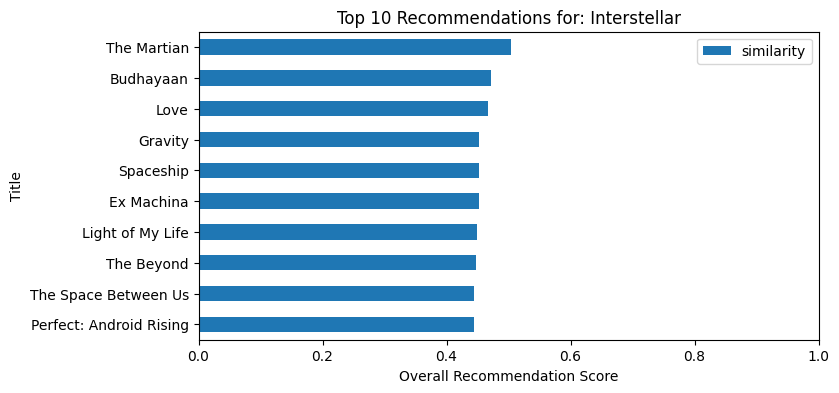

In [93]:
# Bar chart of top-N recommendation scores
recs = recommend("Interstellar", top_n=10, pretty=False)
ax = recs.iloc[::-1].plot.barh(x='title', y='similarity', figsize=(8,4))
ax.set_xlabel('Overall Recommendation Score')
ax.set_ylabel('Title')
ax.set_title('Top 10 Recommendations for: Interstellar')
ax.set_xlim(0, 1.0)

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


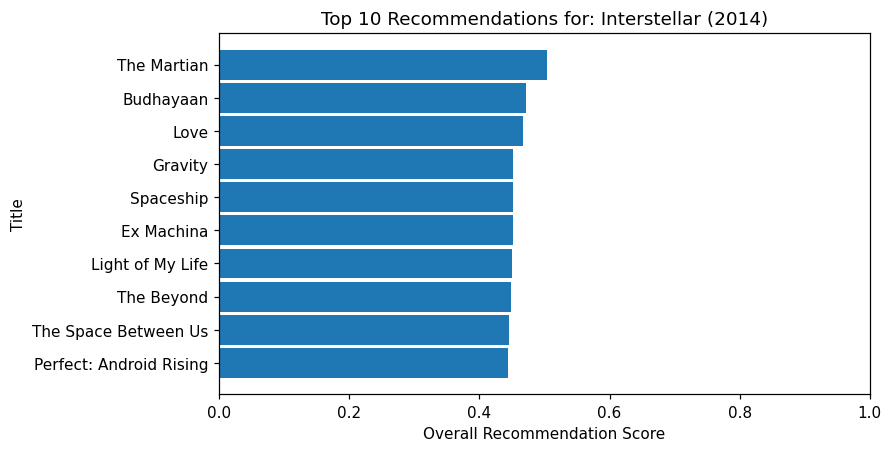

In [94]:
# Bar chart of top-N recommendation scores
def plot_topn_scores_fig(title, top_n=10, figsize=(8,4), dpi=110):
    base_title, _, _ = _base_title(title)
    
    recs = recommend(title, top_n=top_n, pretty=False)
    if recs.empty:
        return None
    
    titles = recs['title'].to_list()
    scores = recs['similarity'].to_numpy(float)

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi, constrained_layout=True)
    
    y = np.arange(len(titles))
    ax.barh(y, scores, height=0.9)
    ax.set_yticks(y, titles)
    ax.invert_yaxis()
    ax.set_xlabel('Overall Recommendation Score')
    ax.set_ylabel('Title')
    ax.set_title(f"Top {top_n} Recommendations for: {base_title}")
    ax.set_xlim(0, 1.0)
    
    plt.close(fig)
    return fig

plot_topn_scores_fig("Interstellar")

# used for Streamlit

### Visualization 2 - Similarity Score Distribution Histogram

Top 200 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


Text(0, 0.5, 'Count')

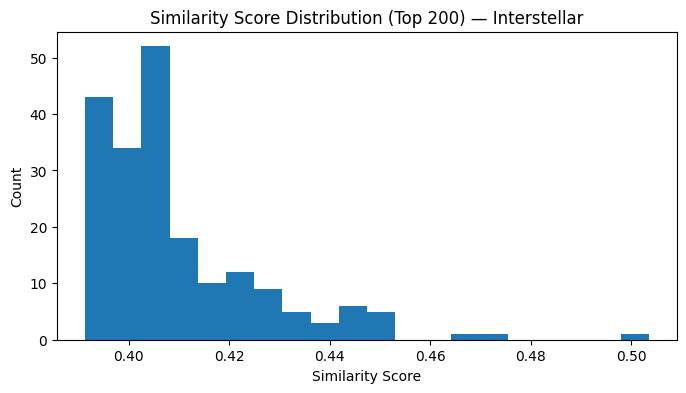

In [95]:
# Similarity score distribution histogram
rec = recommend("Interstellar", top_n=200, pretty=False)
ax = rec['similarity'].plot(kind='hist', bins=20, figsize=(8,4), title='Similarity Score Distribution (Top 200) — Interstellar')
ax.set_xlabel('Similarity Score')
ax.set_ylabel('Count')

Top 200 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


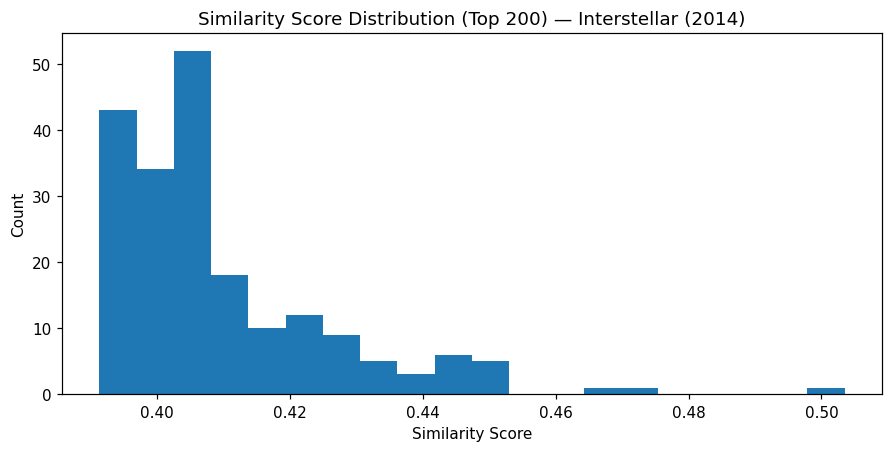

In [96]:
# Similarity score distribution histogram
def plot_score_distribution_fig(title, top_n=200, bins=20, figsize=(8,4), dpi=110):
    base_title, _, _ = _base_title(title)
    
    recs = recommend(title, top_n=top_n, pretty=False)
    if recs.empty:
        return None
    
    scores = recs['similarity'].to_numpy(float)

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi, constrained_layout=True)
    
    ax.hist(scores, bins=bins)
    ax.set_xlabel('Similarity Score')
    ax.set_ylabel('Count')
    ax.set_title(f"Similarity Score Distribution (Top {top_n}) — {base_title}")

    plt.close(fig)
    return fig
    
plot_score_distribution_fig("Interstellar")

# used for Streamlit

### Visualization 3 - Score Breakdown Stacked Horizontal Bar Chart

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


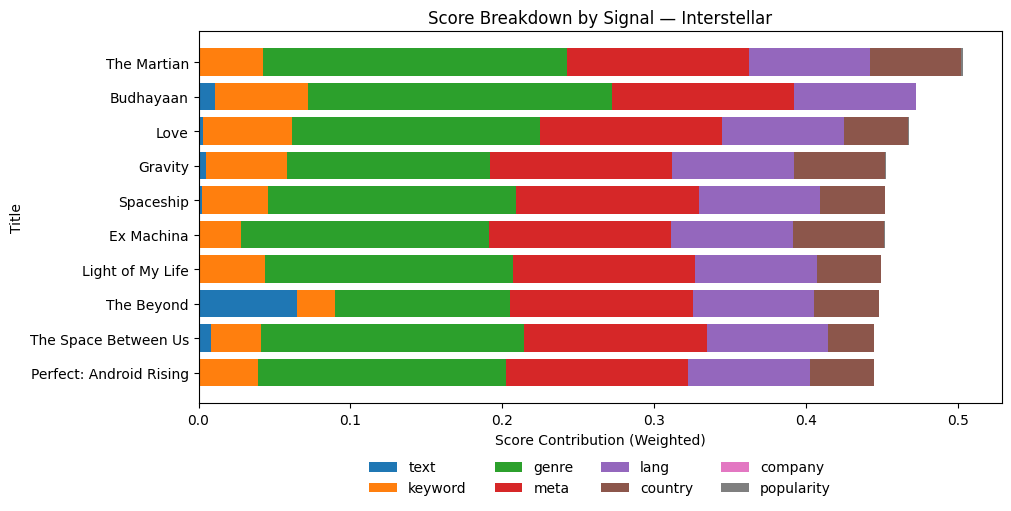

In [97]:
# Score breakdown by signal
title = "Interstellar"

signals = list(WEIGHTS)

base_title, _, base_pos = _base_title(title)

recs = recommend(title, top_n=10, pretty=False)

sims = compute_similarities(base_pos)
if 'id' in recs.columns and 'id' in ml_df.columns:
    labels = (ml_df.reset_index().
              merge(recs[['id']], on='id', how='right')['index'].to_numpy())
else:
    labels = (ml_df.reset_index()
              .merge(recs[['title','release_year']], on=['title','release_year'], how='right')['index'].to_numpy())
idx = ml_df.index.get_indexer(labels)

parts = np.vstack([WEIGHTS[s] * sims[s][idx] for s in signals])
pop = ml_df['popularity'].to_numpy(float)
pop_scaled = (pop - np.nanmin(pop)) / (np.nanmax(pop) - np.nanmin(pop) + 1e-9)
parts = np.vstack([parts, 0.05 * pop_scaled[idx]])
labels = list(WEIGHTS.keys()) + ['popularity']

y = np.arange(len(recs))
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
left = np.zeros(len(recs))
for row, lab in zip(parts, labels):
    ax.barh(y, row, left=left, label=lab)
    left += row

ax.set_yticks(y, recs['title'].values)
ax.invert_yaxis()
ax.set_xlabel('Score Contribution (Weighted)')
ax.set_ylabel('Title')
ax.set_title(f"Score Breakdown by Signal — {title}")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)

plt.show()

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


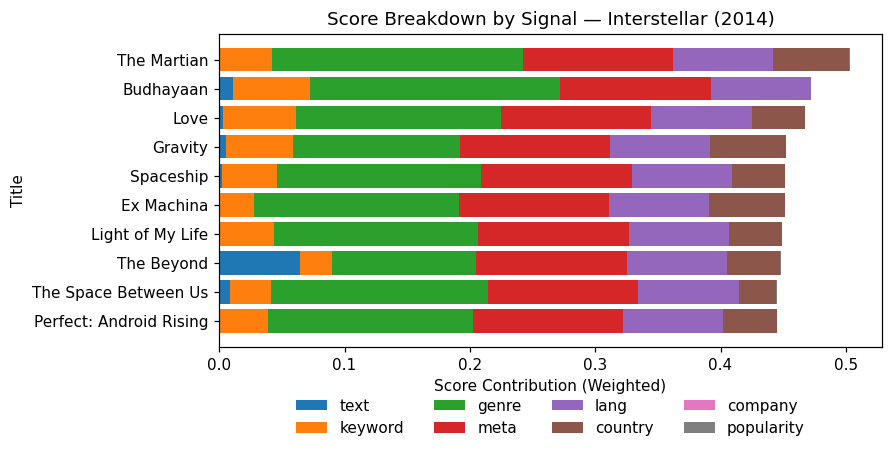

In [102]:
# Score breakdown by signal
def plot_score_breakdown_fig(title, top_n=10, figsize=(8,4), dpi=110):
    signals = list(WEIGHTS)

    base_title, _, base_pos = _base_title(title)
    if base_pos is None:
        return None

    recs = recommend(title, top_n=top_n, pretty=False)
    if recs.empty:
        return None

    # Align Top-N rows back to master dataframe by (title, release_year)
    labels = (ml_df.reset_index()
              .merge(recs[['title','release_year']], on=['title','release_year'],
                     how='right')['index'].to_numpy())
    idx = ml_df.index.get_indexer(labels)

    sims = compute_similarities(int(base_pos))
    parts = np.vstack([WEIGHTS[s] * sims[s][idx] for s in signals])

    # Popularity bump part (same as recommend)
    pop = ml_df['popularity'].to_numpy(float)
    pop_scaled = (pop - np.nanmin(pop)) / (np.nanmax(pop) - np.nanmin(pop) + 1e-9)
    parts = np.vstack([parts, 0.05 * pop_scaled[idx]])
    legend_labels = signals + ['popularity']

    y = np.arange(len(recs))
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi, constrained_layout=True)
    left = np.zeros(len(recs))
    for row, lab in zip(parts, legend_labels):
        ax.barh(y, row, left=left, label=lab)
        left += row

    ax.set_yticks(y, recs['title'].values)
    ax.invert_yaxis()
    ax.set_xlabel('Score Contribution (Weighted)')
    ax.set_ylabel('Title')
    ax.set_title(f"Score Breakdown by Signal — {base_title}")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4, frameon=False)

    plt.close(fig)
    return fig

plot_score_breakdown_fig("Interstellar")

# used for Streamlit

### Visualization 4 - Token Frequency Categorical Bar Chart

Top 50 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


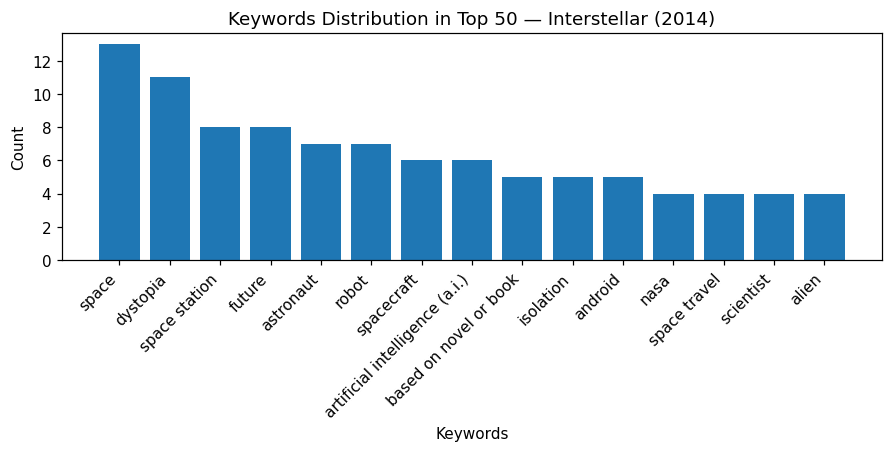

In [99]:
# Token frequency distribution (Keywords or Genres)
from collections import Counter

def plot_dist_fig(title, top_n=50, by='keywords', top_tokens=15, figsize=(8,4), dpi=110):
    base_title, _, _ = _base_title(title)

    col = {'keywords': 'Keywords', 'genres': 'Genres'}.get(str(by).strip().lower())
    if col is None:
        return None

    recs = recommend(title, top_n=top_n, pretty=True)
    if col is None or col not in recs.columns:
        return None

    # split comma-separated tokens
    items = []
    for v in recs[col].fillna('').astype(str).str.replace('_', ' ', regex=False):
        items.extend([t.strip() for t in v.split(',') if t.strip()])

    counts = Counter(items)
    if not counts:
        return None

    labels, nums = zip(*counts.most_common(top_tokens))

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi, constrained_layout=True)

    ax.bar(range(len(nums)), nums)
    ax.set_xticks(range(len(labels)), labels, rotation=45, ha='right')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f"{col} Distribution in Top {top_n} — {base_title}")

    plt.close(fig)
    return fig

plot_dist_fig("Interstellar", by='keywords')

### Saving Figs to Project Folder

In [ ]:
# Save figure files to project folder
# FIGSIZE = (8, 4)
# DPI = 200

# import os
# os.makedirs('figures', exist_ok=True)

# fig = plot_topn_scores_fig("Interstellar", figsize=FIGSIZE, dpi=DPI); fig.savefig("figures/topn.png", dpi=DPI, bbox_inches='tight')
# fig = plot_score_distribution_fig("Interstellar", figsize=FIGSIZE, dpi=DPI); fig.savefig("figures/dist.png", dpi=DPI, bbox_inches='tight')
# fig = plot_score_breakdown_fig("Interstellar", figsize=FIGSIZE, dpi=DPI); fig.savefig("figures/breakdown.png", dpi=DPI, bbox_inches='tight')
# fig = plot_dist_fig("Interstellar", by="keywords", figsize=FIGSIZE, dpi=DPI); fig.savefig("figures/tokens.png", dpi=DPI, bbox_inches='tight')

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)
Top 200 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)
Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)
Top 50 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


## Explaining Recommendations

In [101]:
def explain_recs(title, top_n=10, weights=None, as_percent=False):
    # Return a table that explains the Top-N picks by:
    #   - raw cosine similarities per signal (text/keyword/genre/meta/lang/country/company)
    #   - weighted contribution from each signal
    #   - popularity bump used in the final score
    #   - total score (same ordering as recommend)
    
    # 1) get Top-N
    recs = recommend(title, top_n=top_n, pretty=False)
    if recs.empty:
        return recs  # return empty df

    # 2) resolve base and pull similarities
    base_index, base_pos = get_base_index(title)
    if base_index is None:
        return recs.iloc[0:0]

    W = weights or {'text':0.25,'keyword':0.25,'genre':0.20,'meta':0.12,'lang':0.08,'country':0.06,'company':0.04}
    signals = list(W)
    sims = compute_similarities(base_pos)  # dict of arrays aligned to ml_df

    # 3) align Top-N rows back to ml_df positions (prefer 'id' if available)
    if 'id' in recs.columns and 'id' in ml_df.columns:
        labels = (ml_df.reset_index()
                    .merge(recs[['id']], on='id', how='right')['index'].to_numpy())
    else:
        labels = (ml_df.reset_index()
                    .merge(recs[['title','release_year']], on=['title','release_year'], how='right')['index'].to_numpy())
    idx = ml_df.index.get_indexer(labels)

    # 4) raw per-signal sims (cosine) for the Top-N, plus contributions = weight * sim
    raw = {s: sims[s][idx] for s in signals}
    contrib = {f"{s}_part": W[s] * raw[s] for s in signals}

    # 5) popularity bump (same as recommender)
    pop = ml_df['popularity'].to_numpy(float)
    pop = (pop - np.nanmin(pop)) / (np.nanmax(pop) - np.nanmin(pop) + 1e-9)
    pop_part = 0.05 * pop[idx]

    # 6) total score = sum(contribs) + pop_part (matches recommend’s blend)
    total = pop_part.copy()
    for s in signals:
        total += contrib[f"{s}_part"]

    # 7) build the explanation table in the same order as recs
    out = recs[['title','release_year']].copy()

    # raw sims (nice to inspect)
    out['text_sim'] = raw['text']
    out['keyword_sim'] = raw['keyword']
    out['genre_sim'] = raw['genre']
    out['meta_sim'] = raw['meta']
    out['lang_sim'] = raw['lang']
    out['country_sim'] = raw['country']
    out['company_sim'] = raw['company']

    # contributions
    out['text_part'] = contrib['text_part']
    out['keyword_part'] = contrib['keyword_part']
    out['genre_part'] = contrib['genre_part']
    out['meta_part'] = contrib['meta_part']
    out['lang_part'] = contrib['lang_part']
    out['country_part'] = contrib['country_part']
    out['company_part'] = contrib['company_part']

    # popularity + total
    out['pop_part'] = pop_part
    out['score'] = total

    if as_percent:
        pct_cols = ['text_sim','keyword_sim','genre_sim','meta_sim','lang_sim','country_sim','company_sim',
                    'text_part','keyword_part','genre_part','meta_part','lang_part','country_part','company_part',
                    'pop_part','score']
        out[pct_cols] = (out[pct_cols] * 100).round(1)

    return out

explain_recs("Interstellar", top_n=10)

Top 10 recommendations for: Interstellar (2014)
Scored by: text (0.25), keywords (0.25), genres (0.20), meta (0.10), language (0.10), countries (0.06), companies (0.04) (+ small popularity bump)


,title,release_year,text_sim,keyword_sim,genre_sim,meta_sim,lang_sim,country_sim,company_sim,text_part,keyword_part,genre_part,meta_part,lang_part,country_part,company_part,pop_part,score
0,The Martian,2015,0.000000,0.168880,1.000000,1.0,1.0,1.000000,0.0,0.000000,0.042220,0.200000,0.12,0.08,0.060000,0.0,0.001269,0.503489
1,Budhayaan,2016,0.042585,0.246183,1.000000,1.0,1.0,0.000000,0.0,0.010646,0.061546,0.200000,0.12,0.08,0.000000,0.0,0.000010,0.472202
2,Love,2011,0.012565,0.233550,0.816497,1.0,1.0,0.707107,0.0,0.003141,0.058387,0.163299,0.12,0.08,0.042426,0.0,0.000185,0.467439
3,Gravity,2013,0.020784,0.213201,0.666667,1.0,1.0,1.000000,0.0,0.005196,0.053300,0.133333,0.12,0.08,0.060000,0.0,0.000518,0.452348
4,Spaceship,2016,0.009831,0.174078,0.816497,1.0,1.0,0.707107,0.0,0.002458,0.043519,0.163299,0.12,0.08,0.042426,0.0,0.000018,0.451721
5,Ex Machina,2015,0.000000,0.111340,0.816497,1.0,1.0,1.000000,0.0,0.000000,0.027835,0.163299,0.12,0.08,0.060000,0.0,0.000447,0.451581
6,Light of My Life,2019,0.000000,0.174078,0.816497,1.0,1.0,0.707107,0.0,0.000000,0.043519,0.163299,0.12,0.08,0.042426,0.0,0.000154,0.449399
7,The Beyond,2018,0.258521,0.100504,0.577350,1.0,1.0,0.707107,0.0,0.064630,0.025126,0.115470,0.12,0.08,0.042426,0.0,0.000178,0.447830
8,The Space Between Us,2017,0.033613,0.131590,0.866025,1.0,1.0,0.500000,0.0,0.008403,0.032898,0.173205,0.12,0.08,0.030000,0.0,0.000231,0.444737
9,Perfect: Android Rising,2013,0.000000,0.155700,0.816497,1.0,1.0,0.707107,0.0,0.000000,0.038925,0.163299,0.12,0.08,0.042426,0.0,0.000029,0.444680
